In [1]:
import os, sys, string, time
import matplotlib.pyplot as plt
import numpy as np
import uproot
import pandas as pd
from platform import python_version
import scipy
from scipy import stats
import uproot3
import math
import csv
from particle import Particle
# from matplotlib.patches import Rectangle

import Utilities.Plotter as PT
import Utilities.Constants as Constants
import Utilities.Variables_list as Variables
import Utilities.Functions as Functions
from Utilities.ipython_exit import exit

print('Success')

Success


In [2]:
Functions.Get_resolution("x", 345)

Given x pixels, calculating y pixels.
194


194

## Reading in single file

In [3]:

def Make_dataframes(file_loc):
    """
    Make dataframes given a .root file location.
    """
    interaction_truth_vars = ["nu_pdg", "ccnc", "npi0"]
    Vars_to_load = Variables.Final_variable_list + Variables.Truth_vars + interaction_truth_vars
    root_file = uproot3.open(file_loc)['nuselection/NeutrinoSelectionFilter']
    df_file = root_file.pandas.df(Vars_to_load, flatten=False)
    
    return df_file

Run = "run3"
df_to_test = Make_dataframes(f'../NuMI_MC/SLIMMED_neutrinoselection_filt_{Run}_overlay.root')
# df_to_test = Make_dataframes(f'../NuMI_data/neutrinoselection_filt_{Run}_beamon_beamgood.root')
    
Functions.make_unique_ev_id(df_to_test)

print(f"Loaded {Run} files.")

df_to_test.keys()

Loaded run3 files.


Index(['run', 'sub', 'evt', 'nslice', 'n_pfps', 'n_tracks', 'n_showers',
       'swtrig_pre', 'swtrig_post', 'trk_sce_start_x_v', 'trk_sce_start_y_v',
       'trk_sce_start_z_v', 'trk_sce_end_x_v', 'trk_sce_end_y_v',
       'trk_sce_end_z_v', 'shr_theta_v', 'shr_phi_v', 'shr_px_v', 'shr_py_v',
       'shr_pz_v', 'shrclusdir0', 'shrclusdir1', 'shrclusdir2',
       'shr_energy_tot', 'trk_theta_v', 'trk_phi_v', 'trk_dir_x_v',
       'trk_dir_y_v', 'trk_dir_z_v', 'trk_energy', 'trk_energy_hits_tot',
       'trk_energy_tot', 'trk_score_v', 'trk_calo_energy_u_v', 'trk_end_x_v',
       'trk_chipr_best', 'pfnplanehits_U', 'pfnplanehits_V', 'pfnplanehits_Y',
       'NeutrinoEnergy2', 'SliceCaloEnergy2', 'nu_flashmatch_score',
       'contained_sps_ratio', 'flash_time', 'contained_fraction', 'trk_score',
       'crtveto', 'shr_tkfit_dedx_U', 'shr_tkfit_dedx_V', 'shr_tkfit_dedx_Y',
       'shr_tkfit_dedx_max', 'shr_tkfit_2cm_dedx_Y', 'shr_chipr',
       'trk_bragg_p', 'trk_bragg_p_v', 'trk_chipr'

## Just looking at dfs

In [7]:
# Just looking at the dataframe
nslice_df = df_to_test.query('nslice==1')
print(len(df_to_test))
print(len(nslice_df))
print(df_to_test.keys())
# df_to_test.head(20)

748702
323744
Index(['run', 'sub', 'evt', 'nslice', 'n_pfps', 'n_tracks', 'n_showers',
       'swtrig_pre', 'swtrig_post', 'trk_sce_start_x_v', 'trk_sce_start_y_v',
       'trk_sce_start_z_v', 'trk_sce_end_x_v', 'trk_sce_end_y_v',
       'trk_sce_end_z_v', 'shr_theta_v', 'shr_phi_v', 'shr_px_v', 'shr_py_v',
       'shr_pz_v', 'shrclusdir0', 'shrclusdir1', 'shrclusdir2',
       'shr_energy_tot', 'trk_theta_v', 'trk_phi_v', 'trk_dir_x_v',
       'trk_dir_y_v', 'trk_dir_z_v', 'trk_energy', 'trk_energy_hits_tot',
       'trk_energy_tot', 'trk_score_v', 'trk_calo_energy_u_v', 'trk_end_x_v',
       'trk_chipr_best', 'pfnplanehits_U', 'pfnplanehits_V', 'pfnplanehits_Y',
       'NeutrinoEnergy2', 'SliceCaloEnergy2', 'nu_flashmatch_score',
       'contained_sps_ratio', 'flash_time', 'contained_fraction', 'trk_score',
       'crtveto', 'shr_tkfit_dedx_U', 'shr_tkfit_dedx_V', 'shr_tkfit_dedx_Y',
       'shr_tkfit_dedx_max', 'shr_tkfit_2cm_dedx_Y', 'shr_chipr',
       'trk_bragg_p', 'trk_bragg_p_v

In [20]:
print(df_to_test['shr_theta_v'].head())
print(nslice_df['shr_theta_v'].head())
print(nslice_df['n_showers'].head()) 
print(nslice_df['n_pfps'].head()) #'trk_score_v'
print(nslice_df['trk_score_v'].head())

entry
0                  [0.561943]
1                          []
2                          []
3    [0.60488117, 0.36775658]
4     [2.1951094, 0.56213015]
Name: shr_theta_v, dtype: object
entry
0                  [0.561943]
3    [0.60488117, 0.36775658]
4     [2.1951094, 0.56213015]
5                [0.67865294]
7                 [2.1232917]
Name: shr_theta_v, dtype: object
entry
0    0
3    0
4    1
5    0
7    0
Name: n_showers, dtype: int32
entry
0    1
3    2
4    2
5    1
7    1
Name: n_pfps, dtype: int32
entry
0                 [0.9768751]
3    [0.99995583, 0.96434164]
4    [0.30477512, 0.97554344]
5                 [0.9997782]
7                  [0.971405]
Name: trk_score_v, dtype: object


In [24]:
print(df_to_test['shr_theta_v'].head())
print(df_to_test['trk_theta_v'].head())
print(df_to_test['shr_phi_v'].head())
print(df_to_test['trk_phi_v'].head()) 
print(df_to_test['shr_tkfit_dedx_max'].head(20))

entry
0                  [0.561943]
1                          []
2                          []
3    [0.60488117, 0.36775658]
4     [2.1951094, 0.56213015]
Name: shr_theta_v, dtype: object
entry
0                [0.6049781]
1                         []
2                         []
3     [0.6132897, 0.3603795]
4    [2.1852891, 0.56132424]
Name: trk_theta_v, dtype: object
entry
0                 [3.010025]
1                         []
2                         []
3     [0.5531805, -1.792935]
4    [-2.28682, -0.19758977]
Name: shr_phi_v, dtype: object
entry
0                 [2.9254634]
1                          []
2                          []
3    [0.57154614, -1.5239161]
4    [-2.324747, -0.19320598]
Name: trk_phi_v, dtype: object
entry
0    -3.402823e+38
1    -3.402823e+38
2    -3.402823e+38
3    -3.402823e+38
4    -3.402823e+38
5    -3.402823e+38
6    -3.402823e+38
7    -3.402823e+38
8    -3.402823e+38
9    -3.402823e+38
10   -3.402823e+38
11    4.504192e+00
12   -3.402823e+38
13   

## Picking event

In [4]:
#Set these
# Run = 16219
# SubRun = 10
# Event = 513

# Run = 16333
# SubRun = 24
# Event = 1224

#beamgood
Run = 14902
SubRun = 291
Event = 14555

converted_rse = str(Run) + "_" + str(SubRun) + "_" + str(Event)

print(converted_rse)

isolated_event = df_to_test.loc[(df_to_test['rse_id'].isin([converted_rse]))]

# print(isolated_event)


14902_291_14555


In [6]:
print("Total reconstructed slice energy is: ")

print(isolated_event["NeutrinoEnergy2"])


Total reconstructed slice energy is: 
entry
540817    188.462875
Name: NeutrinoEnergy2, dtype: float32
Particles are: 


In [5]:
print("Truth pdgs are: ")

print(isolated_event["mc_pdg"])

entry = isolated_event.index[0]
truth_particles = []

print("Particles are: ")
for pdg in isolated_event["mc_pdg"][entry]:
    print(Particle.from_pdgid(int(pdg)))
    truth_particles.append(str(Particle.from_pdgid(int(pdg))))

Truth pdgs are: 
entry
540817    []
Name: mc_pdg, dtype: object
Particles are: 


In [81]:
print("Interaction type is: ")
nu_pdg = isolated_event["nu_pdg"][entry]
ccnc = isolated_event["ccnc"][entry]
npi0 = isolated_event["npi0"][entry]
print("Code: "+str(isolated_event["nu_pdg"][entry]))
print("ccnc is: " + str(ccnc))

r"$\nu_{\mu}$ CC $0\pi^{0}$", r"$\nu_{\mu}$ NC $n\pi^{0}$", r"$\nu_{\mu}$ NC $0\pi^{0}$", r"$\nu_{e}$"

if (nu_pdg==14 or nu_pdg==-14) and ccnc==0 and npi0>=1: interaction_type = r"$\nu_{\mu}$ CC $n\pi^{0}$"
elif (nu_pdg==14 or nu_pdg==-14) and ccnc==0 and npi0>=1: interaction_type = r"$\nu_{\mu}$ CC $0\pi^{0}$"
elif (nu_pdg==14 or nu_pdg==-14) and ccnc==1 and npi0>=1: interaction_type = r"$\nu_{\mu}$ NC $n\pi^{0}$"
elif (nu_pdg==14 or nu_pdg==-14) and ccnc==1 and npi0==0: interaction_type = r"$\nu_{\mu}$ NC $0\pi^{0}$"
elif (nu_pdg==12 or nu_pdg==-12): interaction_type = r"$\nu_{e}$"

print(interaction_type)

Interaction type is: 
Code: 14
ccnc is: 1
$\nu_{\mu}$ NC $0\pi^{0}$


In [82]:
print("Total Energies are: ")

non_nu_Energy = 0

for i, Energy in enumerate(isolated_event["mc_E"][entry]):
    print(truth_particles[i]+": "+str(Energy)+ " GeV")
    if i != 0: non_nu_Energy += Energy

print("Non-neutrino particles: " + str(non_nu_Energy) + " GeV")

Total Energies are: 
nu(mu): 0.75277126 GeV
n: 0.97791857 GeV
p: 0.98876715 GeV
pi-: 0.3183972 GeV
p: 0.9394203 GeV
Non-neutrino particles: 3.2245031893253326 GeV


In [83]:
magnitude_momenta = []
direction_particle = []

def Get_magnitude_mom(px, py, pz):
    """
    Given individual components of momenta, returns the magnitude of momentum.
    """
    squared_sum = px**2 + py**2 + pz**2
    magnitude = np.sqrt(squared_sum)
    return magnitude

def Get_direction(mom_1, mom_2, direction):
    """
    Provide 2 lists of px, py, pz.
    Returns their angles wrt \"direction\" vector provided.
    Also returns the opening angle between the two momenta lists. 
    """
    dot_1 = direction[0]*mom_1[0] + direction[1]*mom_1[1] + direction[2]*mom_1[2] # a dot b
    dot_2 = direction[0]*mom_2[0] + direction[1]*mom_2[1] + direction[2]*mom_2[2] # a dot b
    mag_1 = np.sqrt(mom_1[0]**2 + mom_1[1]**2 + mom_1[2]**2)
    mag_2 = np.sqrt(mom_2[0]**2 + mom_2[1]**2 + mom_2[2]**2)
    mag_dir = np.sqrt(direction[0]**2 + direction[1]**2 + direction[2]**2)

    p_sum = [mom_1[0]+mom_2[0], mom_1[1]+mom_2[1], mom_1[2]+mom_2[2]]
    p_sum_dot_dir = p_sum[0]*direction[0] + p_sum[1]*direction[1] + p_sum[2]*direction[2]
    p_sum_mag = np.sqrt((mom_1[0]+mom_2[0])**2+(mom_1[1]+mom_2[1])**2+(mom_1[2]+mom_2[2])**2) # magnitude 1 plus 2

    direction_1 = np.arccos(dot_1/(mag_1*mag_dir))
    direction_2 = np.arccos(dot_2/(mag_2*mag_dir))
    combined_angle = np.arccos(p_sum_dot_dir/(p_sum_mag*mag_dir))
        
    return direction_1, direction_2, combined_angle

def Convert_radians_to_deg(radians):
    """
    Input radians, returns degrees
    """
    degrees = radians*180/np.pi
    return degrees
    
    
print("Magnitude of momenta are: ")
for i, Energy in enumerate(isolated_event["mc_E"][entry]):
    px = isolated_event["mc_px"][entry][i]
    py = isolated_event["mc_py"][entry][i]
    pz = isolated_event["mc_pz"][entry][i]
    
    mag_p = Get_magnitude_mom(px, py, pz)
    
    print(truth_particles[i]+": "+str(mag_p)+ " GeV")
    
interest_p1 = 0
interest_p2 = 1

mom_1 = [isolated_event["mc_px"][entry][interest_p1], isolated_event["mc_py"][entry][interest_p1], isolated_event["mc_pz"][entry][interest_p1]]
mom_2 = [isolated_event["mc_px"][entry][interest_p2], isolated_event["mc_py"][entry][interest_p2], isolated_event["mc_pz"][entry][interest_p2]]

pos_1 = [isolated_event['mc_vx'][entry][interest_p1], isolated_event['mc_vy'][entry][interest_p1], isolated_event['mc_vz'][entry][interest_p1]]
pos_2 = [isolated_event['mc_vx'][entry][interest_p2], isolated_event['mc_vy'][entry][interest_p2], isolated_event['mc_vz'][entry][interest_p2]]

end_1 = [isolated_event['mc_endx'][entry][interest_p1], isolated_event['mc_endy'][entry][interest_p1], isolated_event['mc_endz'][entry][interest_p1]]
end_2 = [isolated_event['mc_endx'][entry][interest_p2], isolated_event['mc_endy'][entry][interest_p2], isolated_event['mc_endz'][entry][interest_p2]]


Magnitude of momenta are: 
nu(mu): 0.7527712686908294 GeV
n: 0.271185701518239 GeV
p: 0.31193919295009015 GeV
pi-: 0.2861764362666339 GeV
p: 0.04643371392024028 GeV


In [84]:
print("Vertex positions:")
print(str(truth_particles[interest_p1]) + ": " + str(pos_1))
print(str(truth_particles[interest_p2]) + ": " + str(pos_2))

print("\nEnd positions:")
print(str(truth_particles[interest_p1]) + ": " + str(end_1))
print(str(truth_particles[interest_p2]) + ": " + str(end_2))

print("\nMomenta:")
print(str(truth_particles[interest_p1]) + ": " + str(mom_1))
print(str(truth_particles[interest_p2]) + ": " + str(mom_2))


Vertex positions:
nu(mu): [10.369242, -57.379227, 203.86557]
n: [10.369242, -57.379227, 203.86557]

End positions:
nu(mu): [9865.911, 16354.831, 74163.0]
n: [55.107506, -21.956083, 178.83292]

Momenta:
nu(mu): [0.097111195, 0.16171707, 0.72875345]
n: [0.23860088, 0.12885997, 0.0025325327]


In [85]:
z_dir = [0,0,1]
av_HNL_dir = [0.324,0.738,-0.591]

uboone_angle_1, uboone_angle_2, uboone_combined_angle = Get_direction(mom_1, mom_2, z_dir)
absorber_angle_1, absorber_angle_2, absorber_combined_angle = Get_direction(mom_1, mom_2, av_HNL_dir)

print("Angles wrt. z dir. are: ")

print(truth_particles[interest_p1]+": "+str(uboone_angle_1)+ " radians")
print(truth_particles[interest_p2]+": "+str(uboone_angle_2)+ " radians")
print("Combined: " + str(uboone_combined_angle)+ " radians")

print(truth_particles[interest_p1]+": "+str(Convert_radians_to_deg(uboone_angle_1))+ " degrees")
print(truth_particles[interest_p2]+": "+str(Convert_radians_to_deg(uboone_angle_2))+ " degrees")
print("Combined: " + str(Convert_radians_to_deg(uboone_combined_angle))+ " degrees")

print()
print("Angles wrt. absorber are: ")

print(truth_particles[interest_p1]+": "+str(absorber_angle_1)+ " radians")
print(truth_particles[interest_p2]+": "+str(absorber_angle_2)+ " radians")
print("Combined: " + str(absorber_combined_angle)+ " radians")

print(truth_particles[interest_p1]+": "+str(Convert_radians_to_deg(absorber_angle_1))+ " degrees")
print(truth_particles[interest_p2]+": "+str(Convert_radians_to_deg(absorber_angle_2))+ " degrees")
print("Combined: " + str(Convert_radians_to_deg(absorber_combined_angle))+ " degrees")


Angles wrt. z dir. are: 
nu(mu): 0.25328636424012435 radians
n: 1.561457451367601 radians
Combined: 0.5456618101324653 radians
nu(mu): 14.512239679172424 degrees
n: 89.46492185261752 degrees
Combined: 31.264118762059123 degrees

Angles wrt. absorber are: 
nu(mu): 1.9519663091889634 radians
n: 0.8885039922277959 radians
Combined: 1.698590580695429 radians
nu(mu): 111.83943126825592 degrees
n: 50.9075288351772 degrees
Combined: 97.32207139452376 degrees


In [86]:
#Getting theta and phi of a vector

def Get_uboone_angles(mom_1):
    """
    Provide list of px, py, pz.
    Returns the theta and phi angles in uboone coordinates. 
    """
    mag_mom = Get_magnitude_mom(mom_1[0], mom_1[1], mom_1[2])
    
    z_dir = [0, 0, 1]
    transverse_z = [1,1,0]
    
    dot_1 = z_dir[0]*mom_1[0] + z_dir[1]*mom_1[1] + z_dir[2]*mom_1[2] # a dot b
    
    # dot_transverse = np.sqrt(mom_1[0]**2 + mom_1[1]**2) #/mag_mom
    pt = np.sqrt(mom_1[0]**2 + mom_1[1]**2) #/mag_mom
    
    theta = np.arctan2(pt, mom_1[2])
    phi = np.arctan2(mom_1[1], mom_1[0])
    
#     dot_2 = direction[0]*mom_2[0] + direction[1]*mom_2[1] + direction[2]*mom_2[2] # a dot b
#     mag_1 = np.sqrt(mom_1[0]**2 + mom_1[1]**2 + mom_1[2]**2)
#     mag_2 = np.sqrt(mom_2[0]**2 + mom_2[1]**2 + mom_2[2]**2)
#     mag_dir = np.sqrt(direction[0]**2 + direction[1]**2 + direction[2]**2)

#     p_sum = [mom_1[0]+mom_2[0], mom_1[1]+mom_2[1], mom_1[2]+mom_2[2]]
#     p_sum_dot_dir = p_sum[0]*direction[0] + p_sum[1]*direction[1] + p_sum[2]*direction[2]
#     p_sum_mag = np.sqrt((mom_1[0]+mom_2[0])**2+(mom_1[1]+mom_2[1])**2+(mom_1[2]+mom_2[2])**2) # magnitude 1 plus 2

#     direction_1 = np.arccos(dot_1/(mag_1*mag_dir))
#     direction_2 = np.arccos(dot_2/(mag_2*mag_dir))
#     combined_angle = np.arccos(p_sum_dot_dir/(p_sum_mag*mag_dir))
        
    return theta, phi

theta_abs, phi_abs = Get_uboone_angles(av_HNL_dir)
theta_1, phi_1 = Get_uboone_angles(mom_1)

print(Convert_radians_to_deg(theta_abs), Convert_radians_to_deg(phi_abs))

126.25109229442924 66.29735404903376


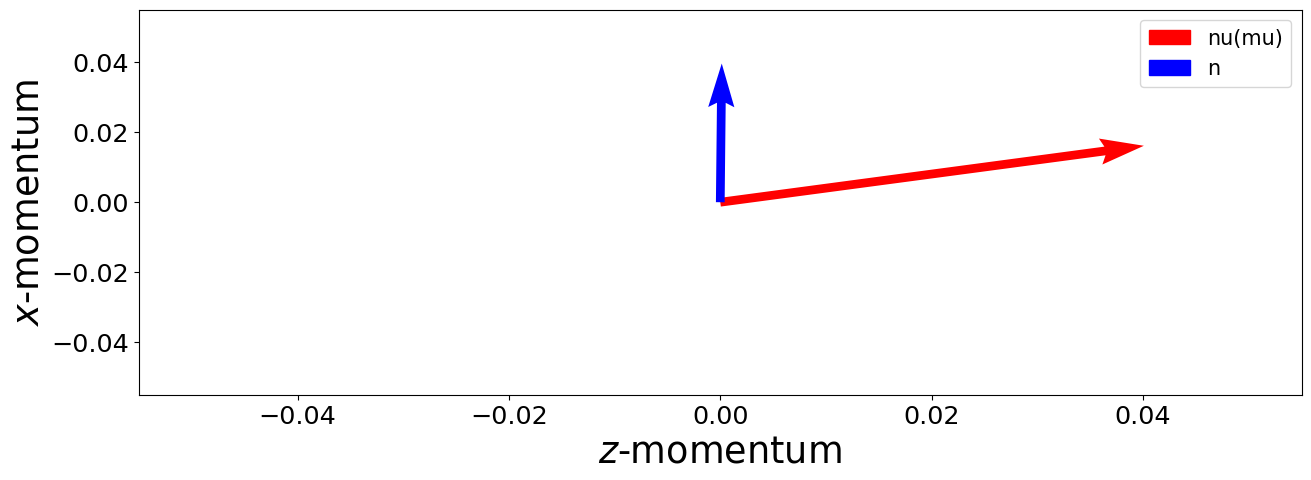

In [87]:
#Plotting momentum vectors
from matplotlib.patches import Patch

V = np.array([[mom_1[2],mom_1[0]], [mom_2[2],mom_2[0]]])
origin = np.array([[0, 0],[0, 0]]) # origin point

# plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=21)
plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=2)

plt.xlabel(r"$z$-momentum")
plt.ylabel(r"$x$-momentum")

leg = [Patch(facecolor='r', edgecolor='r',label=truth_particles[interest_p1]),
       Patch(facecolor='b', edgecolor='b',label=truth_particles[interest_p2])]

plt.legend(handles=leg)

plt.show()


# Finished code

In [90]:
Functions.Get_resolution("x", 342)

Given x pixels, calculating y pixels.
192


192